# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [63]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [64]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [65]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
sys.path.append(api_key_path)

# Import Census API Key
from untracked_api_keys import census_key
c = Census(census_key, year=2019)

# Import Google API key
from untracked_api_keys import g_key

In [66]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()

,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [67]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()

,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [68]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


In [69]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Daily Vaccination Administered Data by state
Vaccine_admin_path = r"..\data_manipulation\clean_data\Vaccines_Administered_df.csv"
vaccine_admin_df = pd.read_csv(Vaccine_admin_path)
vaccine_admin_df

,state_name,state_code,date,day_num,daily_vaccinations
0,Alabama,AL,2021-01-13,30,5906
1,Alabama,AL,2021-01-14,31,7083
2,Alabama,AL,2021-01-15,32,7478
3,Alabama,AL,2021-01-16,33,7498
4,Alabama,AL,2021-01-17,34,7509
...,...,...,...,...,...
6518,Wyoming,WY,2021-04-18,125,1857
6519,Wyoming,WY,2021-04-19,126,1884
6520,Wyoming,WY,2021-04-20,127,2657
6521,Wyoming,WY,2021-04-21,128,2260


# Group 3 Analysis

#### Line Plot showing Cumulative National Vaccine Allocations and Reported deaths by date

* x-axis = Date

* Left y-axis = Total vaccine doses allocated
    * Note, cumulative across states

* Right y-axis = New deaths reported

* Example report with separate plots: https://www.cnbc.com/2021/04/09/covid-19-cases-deaths-vaccinations-daily-update.html

In [83]:
# Collect summary data
distribution_totals_s = vaccine_allocation_df.groupby(['day_num']).sum().sum(axis=1).cumsum()
# print(distribution_totals_s.head(3))

us_vaccination_df = vaccine_admin_df.loc[vaccine_admin_df['state_name'] != 'Federal Entities',:]

us_vaccination_totals_s = us_vaccination_df.groupby(['day_num']).sum().cumsum()
print(us_vaccination_totals_s.tail(3))


us_cases_deaths_df = cases_deaths_df.groupby(['day_num']).sum()
# print(us_cases_deaths_df.head(3))

         daily_vaccinations
day_num                    
127               213368838
128               216454947
129               219464005


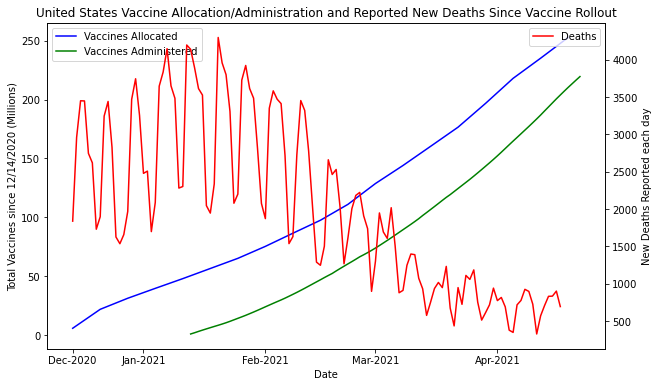

In [85]:
# Plot the data
fig_3a = plt.figure(figsize=(10,6))

# Plot on left axis
ax_3a_L = fig_3a.subplots()

ax_3a_L.plot(distribution_totals_s.index,distribution_totals_s.values/1000000,c='b')

ax_3a_L.plot(us_vaccination_totals_s.index,us_vaccination_totals_s.values/1000000,c='g')

ax_3a_L.set_ylabel('Total Vaccines since 12/14/2020 (Millions)')

ax_3a_L.set_xlabel('Date')

ax_3a_L.set_title('United States Vaccine Allocation/Administration and Reported New Deaths Since Vaccine Rollout')

ax_3a_L.legend(['Vaccines Allocated','Vaccines Administered'],loc='upper left')

# Plot on left axis
ax_3a_R = ax_3a_L.twinx()
ax_3a_R.plot(us_cases_deaths_df.index,us_cases_deaths_df['new_deaths'],c='r')
ax_3a_R.set_ylabel('New Deaths Reported each day')
ax_3a_R.legend(['Deaths'],loc='upper right')


plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.show()

#### Line Plot showing National Vaccine Allocations and Reported deaths by week

* x-axis = Date (weekly on Mondays)

* Left y-axis = Total vaccine doses allocated
    * Note, cumulative across states

* Right y-axis = New deaths reported weekly

* Example report with separate plots: https://www.cnbc.com/2021/04/09/covid-19-cases-deaths-vaccinations-daily-update.html

In [10]:
# Collect collect death data into weekly totals
day_num_daily = us_cases_deaths_df.index.tolist()
new_deaths_daily = us_cases_deaths_df['new_deaths'].tolist()

day_num_weekly = []
new_deaths_weekly = []
death_sum = 0
for day, deaths in zip(day_num_daily,new_deaths_daily):
    if day in distribution_totals_s.index:
        day_num_weekly.append(day)
        new_deaths_weekly.append(death_sum)
        death_sum = deaths
    else:
        death_sum += deaths

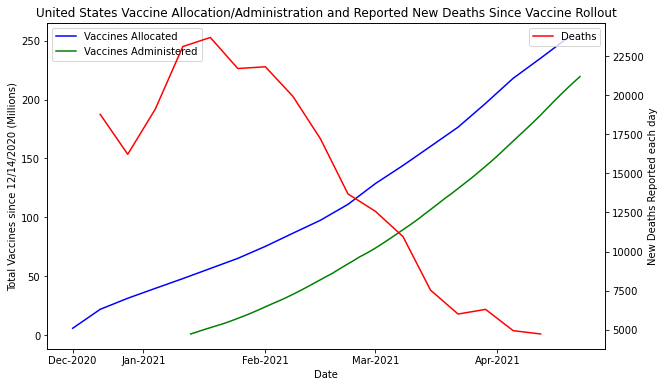

In [87]:
# Plot the data
fig_3b = plt.figure(figsize=(10,6))

# Plot on left axis
ax_3b_L = fig_3b.subplots()

ax_3b_L.plot(distribution_totals_s.index,distribution_totals_s.values/1000000,c='b')

ax_3b_L.plot(us_vaccination_totals_s.index,us_vaccination_totals_s.values/1000000,c='g')

ax_3b_L.set_ylabel('Total Vaccines since 12/14/2020 (Millions)')

ax_3b_L.set_xlabel('Date')

ax_3b_L.set_title('United States Vaccine Allocation/Administration and Reported New Deaths Since Vaccine Rollout')

ax_3b_L.legend(['Vaccines Allocated','Vaccines Administered'],loc='upper left')

# Plot on left axis
ax_3b_R = ax_3b_L.twinx()
ax_3b_R.plot(day_num_weekly[1:],new_deaths_weekly[1:],c='r')
ax_3b_R.set_ylabel('New Deaths Reported each day')
ax_3b_R.legend(['Deaths'],loc='upper right')


plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.show()

#### Line Plot showing Cumulative National Vaccine Regimens and Reported deaths by date

* x-axis = Date (weekly on Mondays)

* Left y-axis = Total vaccine regimens allocated
    * Note, cumulative across states

* Right y-axis = New deaths reported weekly

* Example report with separate plots: https://www.cnbc.com/2021/04/09/covid-19-cases-deaths-vaccinations-daily-update.html

In [91]:
# pfe_dose_1	pfe_dose_2	mrna_dose_1	mrna_dose_2	jnj_dose_1

# Collect summary data for full treatment regimens 
distribution_totals_df = vaccine_allocation_df.groupby(['day_num']).sum()

pfe_regimens = distribution_totals_df[['pfe_dose_1','pfe_dose_2']].sum(axis=1)/2
mrna_regimens = distribution_totals_df[['mrna_dose_1','mrna_dose_2']].sum(axis=1)/2
jnj_regimens = distribution_totals_df[['jnj_dose_1']]

total_regimens = pd.concat([pfe_regimens,mrna_regimens,jnj_regimens],axis=1).sum(axis=1).cumsum()
total_regimens.head(3)

day_num
0      2962050.0
7     11003225.0
14    15693750.0
dtype: float64

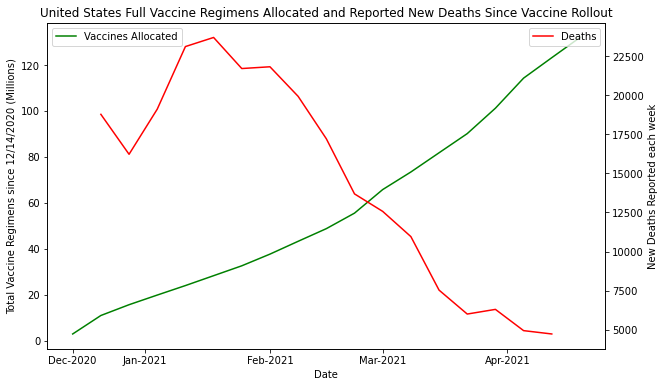

In [90]:
# Plot the data
fig_3c = plt.figure(figsize=(10,6))

# Plot left axis
fig_3c_L = fig_3c.subplots()

fig_3c_L.plot(total_regimens.index,total_regimens.values/1000000,c='g')

fig_3c_L.set_ylabel('Total Vaccine Regimens since 12/14/2020 (Millions)')

fig_3c_L.set_xlabel('Date')

fig_3c_L.set_title('United States Full Vaccine Regimens Allocated and Reported New Deaths Since Vaccine Rollout')

fig_3c_L.legend(['Vaccines Allocated'],loc='upper left')

# Plot right axis
fig_3c_R = fig_3c_L.twinx()
fig_3c_R.plot(day_num_weekly[1:],new_deaths_weekly[1:],c='r')
fig_3c_R.set_ylabel('New Deaths Reported each week')
plt.legend(['Deaths'],loc='upper right')

plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.show()

#### Scatter Plot showing Reported Covid-19 Case Rate vs Poverty Rate by State

* x-axis = Poverty Rate

* y-axis = Reported Covid-19 Case Count / Population

* Include regression analysis

In [31]:
# census_df = state_name	state_code	population	median_age	household_income	per_capita_income	poverty_count	poverty_rate	unemployment_count	unemployment_rate

# cases_deaths_df = state_name	state_code	date	day_num	total_cases	confirmed_cases	probable_cases	new_cases	pnew_cases	total_deaths	confirmed_deaths	probable_deaths	new_deaths	pnew_deaths	consent_cases	consent_deaths	created_at

last_cases_deaths_df = cases_deaths_df.loc[cases_deaths_df.groupby('state_name').day_num.idxmax()]
reported_cases_deaths_df = last_cases_deaths_df.groupby('state_code').sum()

cases_poverty_df = census_df.merge(reported_cases_deaths_df,on='state_code',how='left')
cases_poverty_df['case_rate'] = cases_poverty_df['total_cases']/cases_poverty_df['population']
cases_poverty_df['death_rate'] = cases_poverty_df['total_deaths']/cases_poverty_df['population']
cases_poverty_df.head(3)

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate,...,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,case_rate,death_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946,...,116939.0,508,208.0,10790,8498.0,2292.0,51,9.0,0.107076,0.002213
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114,...,0.0,0,0.0,329,0.0,0.0,0,0.0,0.085806,0.000446
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676,...,61524.0,480,114.0,17151,15229.0,1922.0,-2,-9.0,0.120995,0.002433


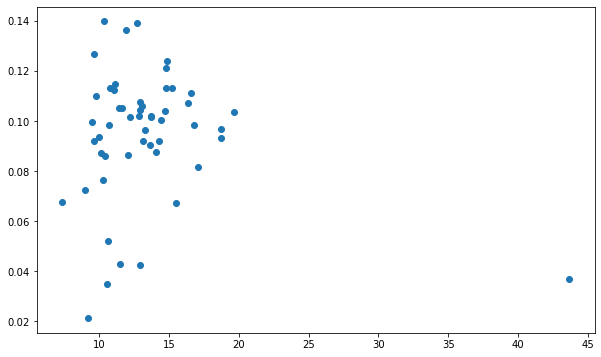

In [32]:
# Plot the data
fig_3d = plt.figure(figsize=(10,6))
ax_3d = fig_3d.subplots()

# Scatter plot
ax_3d.scatter(cases_poverty_df.poverty_rate,cases_poverty_df.case_rate)

plt.show()



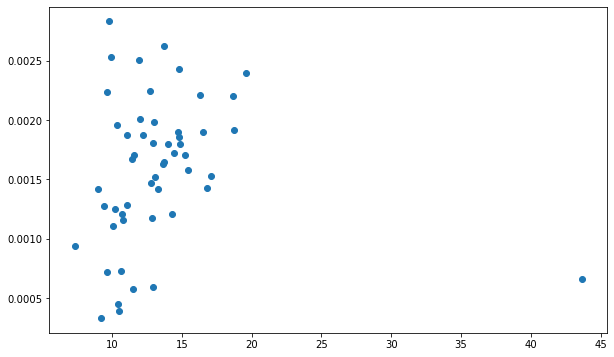

In [33]:
# Plot the data
fig_7a = plt.figure(figsize=(10,6))
ax_7a = fig_7a.subplots()

# Scatter plot
ax_7a.scatter(cases_poverty_df.poverty_rate,cases_poverty_df.death_rate)

plt.show()
